In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 4:
1. Merge training and test data.
2. Exclude named entity. Replace NE into O


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     16311
          JV       0.85      0.85      0.85      4641
          EN       0.93      0.68      0.78      2218
           O       0.98      0.89      0.93      7521
   MIX-ID-EN       0.98      0.86      0.92       852
   MIX-ID-JV       0.97      0.81      0.89       286
   MIX-JV-EN       0.96      0.82      0.89       250

    accuracy                           0.91     32079
   macro avg       0.94      0.84      0.88     32079
weighted avg       0.91      0.91      0.90     32079



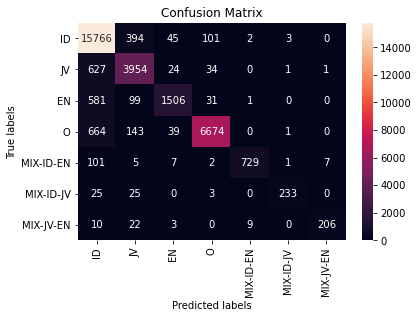


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.98     32818
          JV       0.93      0.94      0.94      9183
          EN       0.98      0.92      0.95      4405
           O       1.00      0.97      0.98     15081
   MIX-ID-EN       0.99      0.97      0.98      1833
   MIX-ID-JV       1.00      0.90      0.94       544
   MIX-JV-EN       0.97      0.93      0.95       533

    accuracy                           0.97     64397
   macro avg       0.98      0.94      0.96     64397
weighted avg       0.97      0.97      0.97     64397



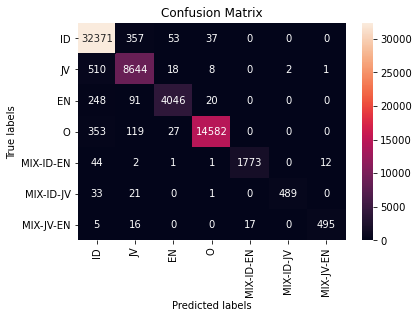


Top likely transitions:
O          -> O          4.18663
EN         -> O          3.30131
ID         -> O          3.29999
JV         -> O          2.96704
MIX-JV-EN  -> O          2.82039
MIX-ID-EN  -> O          2.65659
MIX-ID-JV  -> O          2.38312
EN         -> EN         1.48068
JV         -> JV         1.21672
ID         -> ID         0.78881
O          -> ID         0.67761
O          -> JV         0.56077
MIX-JV-EN  -> JV         0.55990
O          -> EN         0.52242
ID         -> MIX-ID-EN  0.47668
JV         -> MIX-JV-EN  0.39257
MIX-ID-JV  -> JV         0.33806
ID         -> EN         0.14890
EN         -> ID         0.05339
JV         -> MIX-ID-JV  0.05109

Top unlikely transitions:
MIX-ID-EN  -> EN         -0.53400
MIX-ID-JV  -> MIX-JV-EN  -0.54574
JV         -> EN         -0.56282
O          -> MIX-JV-EN  -0.60368
MIX-JV-EN  -> EN         -0.62096
MIX-ID-JV  -> ID         -0.65506
MIX-JV-EN  -> MIX-ID-JV  -0.83670
ID         -> JV         -0.97203
JV         -> ID

In [3]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged-no-ne.tsv')
langid.train_test_result(data=dataset, test_size=0.33, n_label=7, model_name='mod_090422_no_ne.pkl')

In [4]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)